In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# Load the training and testing datasets
train_df = pd.read_csv('/content/training.csv')
test_df = pd.read_csv('/content/testing.csv')

In [51]:
train_df.head

<bound method NDFrame.head of             class  max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  \
0           water   997.904    637.5950     658.668   -1882.030    -1924.36   
1           water   914.198    634.2400     593.705   -1625.790    -1672.32   
2           water  3800.810   1671.3400    1206.880     449.735     1071.21   
3           water   952.178     58.0174   -1599.160     210.714    -1052.63   
4           water  1232.120     72.5180   -1220.880     380.436    -1256.93   
...           ...       ...         ...         ...         ...         ...   
10540  impervious  7579.580   6072.5000    3803.140    3902.220     3897.43   
10541  impervious  2780.930   1895.6800    1454.740    1265.480     1033.56   
10542  impervious  5833.760   3465.7400    1283.320     413.412     4391.05   
10543  impervious  3079.310   2435.3000    1444.400    1133.760     1278.74   
10544  impervious  7352.570   6941.1900    1667.870    5084.780     4832.13   

       20150415_N  20

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10545 entries, 0 to 10544
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       10545 non-null  object 
 1   max_ndvi    10545 non-null  float64
 2   20150720_N  10545 non-null  float64
 3   20150602_N  10545 non-null  float64
 4   20150517_N  10545 non-null  float64
 5   20150501_N  10545 non-null  float64
 6   20150415_N  10545 non-null  float64
 7   20150330_N  10545 non-null  float64
 8   20150314_N  10545 non-null  float64
 9   20150226_N  10545 non-null  float64
 10  20150210_N  10545 non-null  float64
 11  20150125_N  10545 non-null  float64
 12  20150109_N  10545 non-null  float64
 13  20141117_N  10545 non-null  float64
 14  20141101_N  10545 non-null  float64
 15  20141016_N  10545 non-null  float64
 16  20140930_N  10545 non-null  float64
 17  20140813_N  10545 non-null  float64
 18  20140626_N  10545 non-null  float64
 19  20140610_N  10545 non-nul

In [53]:
# Extract the features and target variable from the training data
X_train = train_df.drop(['class'], axis=1)
y_train = train_df['class']

In [54]:
# Extract the features and target variable from the testing data
X_test = test_df.drop(['class'], axis=1)
y_test = test_df['class']


In [55]:
# Train a random forest classifier on the training data
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
# Train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
accuracy_dt = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Classifier Accuracy:", accuracy_dt)

K-Nearest Neighbors Classifier Accuracy: 0.6233333333333333


In [57]:
# Train a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Decision Tree Classifier Accuracy:", accuracy_dtc)

Decision Tree Classifier Accuracy: 0.55


In [58]:
# Train a logistic regression classifier on the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Classifier Accuracy:", accuracy_lr)

Logistic Regression Classifier Accuracy: 0.5


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
# Train a k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Classifier Accuracy:", accuracy_knn)

K-Nearest Neighbors Classifier Accuracy: 0.6233333333333333


In [60]:
# Plot the confusion matrices for each classifier
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_lr = confusion_matrix(y_test, y_pred_lr)

Text(86.25, 0.5, 'Actual')

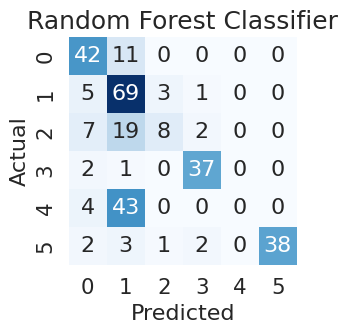

In [61]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,6))

plt.subplot(1, 3, 1)
sns.heatmap(cm_rfc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16}, square=True)
plt.title('Random Forest Classifier', fontsize=18)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)

Text(216.30882352941177, 0.5, 'Actual')

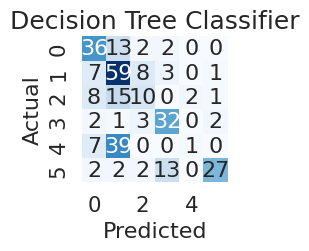

In [62]:
plt.subplot(1, 3, 2)
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16}, square=True)
plt.title('Decision Tree Classifier', fontsize=18)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)



Text(391.36764705882354, 0.5, 'Actual')

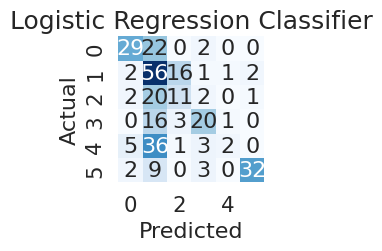

In [63]:
plt.subplot(1, 3, 3)
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16}, square=True)
plt.title('Logistic Regression Classifier', fontsize=18)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)



In [64]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [65]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}


In [66]:
# Instantiate a random forest classifier
rfc = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [67]:
# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [68]:
# Train a random forest classifier on the training data using the best hyperparameters found by GridSearchCV
rfc = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                              max_depth=grid_search.best_params_['max_depth'], 
                              min_samples_split=grid_search.best_params_['min_samples_split'], 
                              min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
rfc.fit(X_train, y_train)

RandomForestClassifier()